In [72]:
import warnings

import pandas as pd
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
warnings.filterwarnings('ignore')

In [110]:


# Read the csv data files
movies = pd.read_csv('movies.csv', 
                     header=None, names=['movieId', 'title', 'genres'])
ratings = pd.read_csv('ratings.csv', 
                      names=['user_id', 'movieId', 'rating', 'rating_timestamp']
                      ).sort_values("rating_timestamp")
                      


In [41]:
movies.head()

,movieId,title,genres
0,MovieID,Title,Genres
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [74]:
ratings.head()

,user_id,movieId,rating,rating_timestamp
63584,414,4023,3,1000129365
63588,414,4033,4,1000129365
63642,414,4229,3,1000129420
97033,603,4789,5,1000193988
97030,603,4784,3,1000194005


In [75]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
warnings.filterwarnings('ignore')

In [76]:
ratings['rating'].value_counts()

4         26818
3         20047
5         13211
3.5       13136
4.5        8551
2          7551
2.5        5550
1          2811
1.5        1791
0.5        1370
Rating        1
Name: rating, dtype: int64

In [77]:
ratings['rating'].describe()

count     100837
unique        11
top            4
freq       26818
Name: rating, dtype: object

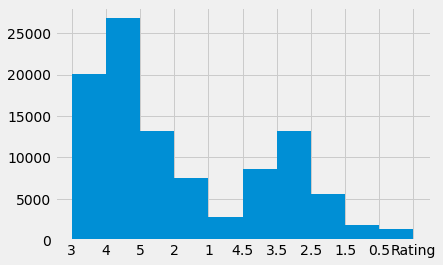

In [78]:
ratings['rating'].hist(bins=10);


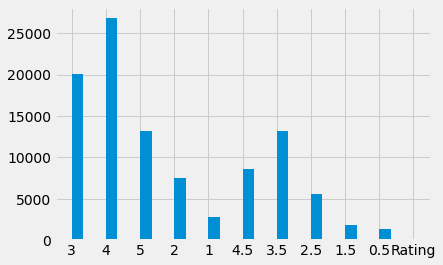

In [79]:
ratings['rating'].hist(bins=30);


In [80]:
ratings.user_id.value_counts().describe()

count     611.000000
mean      165.036007
std       269.341642
min         1.000000
25%        35.000000
50%        70.000000
75%       168.000000
max      2698.000000
Name: user_id, dtype: float64

In [82]:
movies_rating = (ratings
                  .set_index("movieId")
                  .join(movies.set_index("movieId"), 
                        how="left")
                 )

movies_rating.head(2)

,user_id,rating,rating_timestamp,title,genres
movieId,,,,,
1,234,5,1004409347,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,500,4,1005527755,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [83]:
dummies = movies_rating['genres'].str.get_dummies()
dummies.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Genres,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [84]:
movies = pd.merge(ratings, movies, on='movieId')

In [92]:
movies.groupby('title')['rating'].head()


0              3
1              3
2              5
3              4
4            3.5
           ...  
100832         2
100833         4
100834         4
100835         3
100836    Rating
Name: rating, Length: 28809, dtype: object

In [96]:
ratings_mean_count = pd.DataFrame(movies.groupby('title')['rating'])

In [98]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movies.groupby('title')['rating'].count())

In [99]:
ratings_mean_count.head()

,0,1,rating_counts
0,'71 (2014),"98121 4 Name: rating, dtype: object",NaN
1,'Hellboy': The Seeds of Creation (2004),"91997 4 Name: rating, dtype: object",NaN
2,'Round Midnight (1986),"91426 3.5 91427 3.5 Name: rating, dtype:...",NaN
3,'Salem's Lot (2004),"91653 5 Name: rating, dtype: object",NaN
4,'Til There Was You (1997),"91651 5 91652 3 Name: rating, dtype: object",NaN


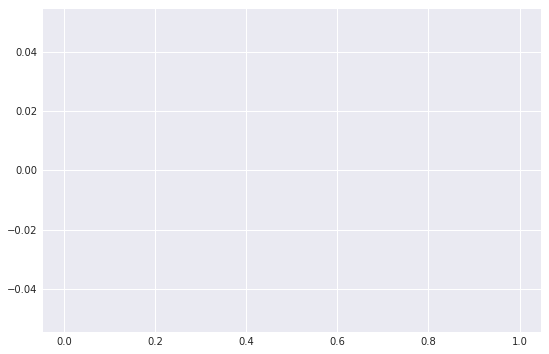

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

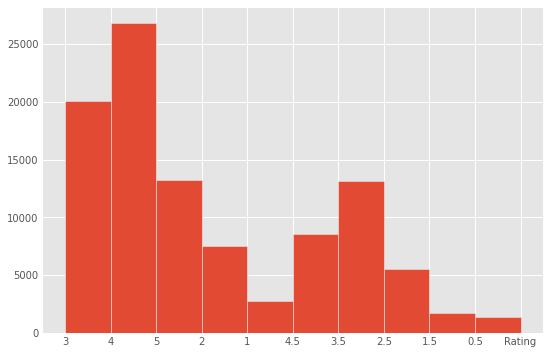

In [111]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings['rating'].hist(bins=10)